In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
import plotly.graph_objects as go
import plotly.express as px

# How to Perform Tukey’s Test in Python

A one-way ANOVA is used to determine whether or not there is a statistically significant difference between the means of three or more independent groups.

If the overall p-value from the ANOVA table is less than some significance level, then we have sufficient evidence to say that at least one of the means of the groups is different from the others.

However, this doesn’t tell us which groups are different from each other. It simply tells us that not all of the group means are equal. In order to find out exactly which groups are different from each other, we must conduct a post hoc test.

One of the most commonly used post hoc tests is Tukey’s Test, which allows us to make pairwise comparisons between the means of each group while controlling for the family-wise error rate.

# ANOVA MODEL

If P-Value is less than .05, we have sufficient evidence to say that the mean values across each group are not equal.

In [101]:
rsn_a=[10, 10.2, 10.12, 10.31, 10.22]
rsn_b=[9.81, 9.9, 9.75, 9.8, 9.8]
rsn_c=[10.11, 10.19, 10.13, 10.23, 10.31]

rsn_df=pd.DataFrame([rsn_a, rsn_b, rsn_c], columns=['run_1', 'run_2', 'run_3', 'run_4', 'run_5'], index=['a','b','c'])
rsn_df['mean']=rsn_df.mean(axis=1)
rsn_df['std']=rsn_df.std(axis=1)

print(rsn_df)

   run_1  run_2  run_3  run_4  run_5    mean       std
a  10.00  10.20  10.12  10.31  10.22  10.170  0.104307
b   9.81   9.90   9.75   9.80   9.80   9.812  0.048744
c  10.11  10.19  10.13  10.23  10.31  10.194  0.072000


In [102]:
anova=f_oneway(rsn_a, rsn_b, rsn_c)
print(anova)

F_onewayResult(statistic=29.790021691973738, pvalue=2.219911866075064e-05)


# Perform Tukey’s Test

The P-Value is less than 0.05 indicating that atleast one of the means of one of the groups is statistically different from the others. 

Tukey's test can used to determine which group is statistically different from the others.

In [103]:
# Need to concat data into one dataset.  repeats is equal to the the amount of times the test is repeated.  

data=rsn_a+rsn_b+rsn_c

#create DataFrame to hold data
df = pd.DataFrame({'score': data,
                   'group': np.repeat(['a', 'b', 'c'], repeats=5)}) 

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=df['score'],
                          groups=df['group'],
                          alpha=0.05)

#display results
print(tukey)


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     a      b   -0.358 0.0001 -0.5059 -0.2101   True
     a      c    0.024 0.9027 -0.1239  0.1719  False
     b      c    0.382    0.0  0.2341  0.5299   True
----------------------------------------------------


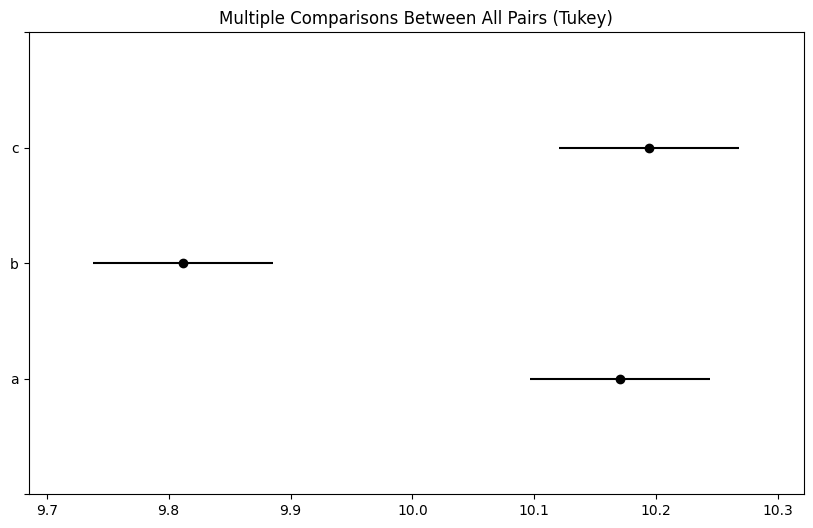

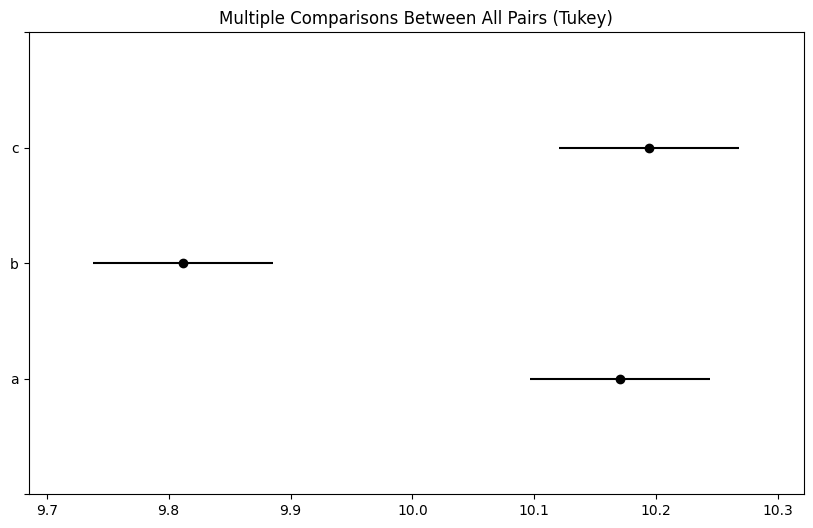

In [104]:
tukey.plot_simultaneous(comparison_name=None, ax=None, figsize=(10, 6), xlabel=None, ylabel=None)


In [105]:
tukey_html=tukey.summary().as_html()
print(tukey_html)


<table class="simpletable">
<caption>Multiple Comparison of Means - Tukey HSD, FWER=0.05</caption>
<tr>
  <th>group1</th> <th>group2</th> <th>meandiff</th>  <th>p-adj</th>  <th>lower</th>   <th>upper</th>  <th>reject</th>
</tr>
<tr>
     <td>a</td>      <td>b</td>    <td>-0.358</td>  <td>0.0001</td> <td>-0.5059</td> <td>-0.2101</td>  <td>True</td> 
</tr>
<tr>
     <td>a</td>      <td>c</td>     <td>0.024</td>  <td>0.9027</td> <td>-0.1239</td> <td>0.1719</td>   <td>False</td>
</tr>
<tr>
     <td>b</td>      <td>c</td>     <td>0.382</td>    <td>0.0</td>  <td>0.2341</td>  <td>0.5299</td>   <td>True</td> 
</tr>
</table>


In [106]:
tukey_csv=tukey.summary().as_csv()
print(tukey_csv)



Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1,group2,meandiff,p-adj , lower , upper ,reject
a     ,b     ,-0.358  ,0.0001,-0.5059,-0.2101,True  
a     ,c     ,0.024   ,0.9027,-0.1239,0.1719 ,False 
b     ,c     ,0.382   ,0.0   ,0.2341 ,0.5299 ,True  


In [107]:
mean_a=sum(rsn_a)/len(rsn_a)
mean_b=sum(rsn_b)/len(rsn_b)
mean_c=sum(rsn_c)/len(rsn_c)

std_a=np.std(mean_a)
std_b=np.std(mean_b)
std_c=np.std(mean_c)




In [108]:
fig=go.Figure(data=[go.Scatter(x=[0,0,0], y=rsn_df['mean'], text=['A<br>size: 40', 'B<br>size: 60', 'C<br>size: 80'],mode='markers', marker=dict(color=['rgb(93, 164, 214)', 'rgb(255, 144, 14)','rgb(44, 160, 101)'],opacity=[1, 0.8, 0.6],size=[40, 60, 80]))])
fig.show()

In [109]:
rsn_df=pd.DataFrame([rsn_a, rsn_b, rsn_c], columns=['run_1', 'run_2', 'run_3', 'run_4', 'run_5'], index=['a','b','c'])
rsn_df=rsn_df.transpose()
print(rsn_df)

           a     b      c
run_1  10.00  9.81  10.11
run_2  10.20  9.90  10.19
run_3  10.12  9.75  10.13
run_4  10.31  9.80  10.23
run_5  10.22  9.80  10.31


In [110]:
fig1=px.box(rsn_df)
fig1.show()

In [111]:
with open('p_graph.html', 'a') as f:
    f.write(fig.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig1.to_html(full_html=False, include_plotlyjs='cdn'))